# Cài đặt
Import các thư viện liên quan chuẩn bị cho qua trình Thống kê Mô tả.
## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

### Tạo thư mục ảnh

In [2]:
import os

# 1. Định nghĩa đường dẫn và tên thư mục
folder_name = "images" 

# 2. Tạo thư mục
os.makedirs(folder_name, exist_ok=True) 

## Đọc dữ liệu

In [3]:
df = pd.read_csv("winequality-red.csv")

## Hiểu dữ liệu


## Thông tin ban đầu về tập dữ liệu

### Thông tin cơ bản

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Số hàng, số cột của dataset
print("(Số dòng, số cột) = " , str(df.shape))
# Hiển thị 5 hàng đầu tiên của dataset
df.head()

(Số dòng, số cột) =  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tổng cộng dataset có 1599 hàng và 12 cột. Nhìn có vẻ không có vấn đề nhưng cần kiểm tra thêm để chắc chắn không có hàng nào có giá trị bị thiếu.

In [6]:
# Get the mode of the data
data_mode = stats.mode(df["quality"])
# Obtain the variance of the data
data_variance = np.var(df["quality"])
# Obtain the 50th percentile of the data
data_percentile = np.percentile(df["quality"],50)
# Obtain the quartiles of the data
data_quartile = np.quantile(df["quality"],0.75)
# Get the IQR of the data
data_IQR = stats.iqr(df["quality"])
print(data_mode, data_variance, data_percentile, data_quartile, data_IQR)

ModeResult(mode=np.int64(5), count=np.int64(681)) 0.6517605398308234 6.0 6.0 1.0


## Thống kê mô tả của các biến số

In [7]:
df.describe().T.style.background_gradient(cmap = "magma")


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [8]:
# Thông qua thống kê
data = {
    "Biến": [
        "Fixed acidity (axit cố định)", "Volatile acidity (axit bay hơi)",
        "Citric acid (axit citric)", "Residual sugar (đường dư)",
        "Chlorides (clorua)", "Free sulfur dioxide (SO₂ tự do)",
        "Total sulfur dioxide (SO₂ tổng)", "Density (khối lượng riêng)",
        "pH", "Sulphates (sunfat)", "Alcohol (ancol)", "Quality (chất lượng)"
    ],
    "Giá trị trung bình": [8.31, 0.52, 0.27, 2.53, 0.08, 15.87, 46.46, 0.99, 3.31, 0.65, 10.42, 5.63],
    "Giá trị cao nhất": [15.9, 1.58, 1.0, 15.5, 0.61, 72, 289, 1.0, 4.01, 2.0, 14.90, 8]
}

df_stats = pd.DataFrame(data)
df_stats

,Biến,Giá trị trung bình,Giá trị cao nhất
0,Fixed acidity (axit cố định),8.31,15.90
1,Volatile acidity (axit bay hơi),0.52,1.58
2,Citric acid (axit citric),0.27,1.00
3,Residual sugar (đường dư),2.53,15.50
4,Chlorides (clorua),0.08,0.61
5,Free sulfur dioxide (SO₂ tự do),15.87,72.00
6,Total sulfur dioxide (SO₂ tổng),46.46,289.00
7,Density (khối lượng riêng),0.99,1.00
8,pH,3.31,4.01
9,Sulphates (sunfat),0.65,2.00


## Dữ liệu trùng lặp

In [9]:
# Kiểm tra dữ liệu trùng lặp
duplicates = df[df.duplicated()]
print(duplicates)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

In [10]:
# Xử lý giá trị trùng lặp
df_duplicate = df.drop_duplicates()
df_duplicate_dropped = df_duplicate[df_duplicate.duplicated()]
print("Rows:", df_duplicate.shape, '\n', df_duplicate_dropped)

Rows: (1359, 12) 
 Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


Dataset sau khi xử lý 240 hàng giá trị bị trùng còn lại 1359 hàng.

## Giá trị bị thiếu

In [22]:
# Hiển thị giá trị bị thiếu cho từng cột
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Dataset hiện tại khá thân thiện, không có cột nào bị thiếu giá trị. Vì thế không cần xử lý thêm các bước để xử lý mà có thể tiến hành vào phân tích, thống kê ngay.

## Trực quan hóa

### Biểu đồ của biến "quality"


<Figure size 2000x1200 with 0 Axes>

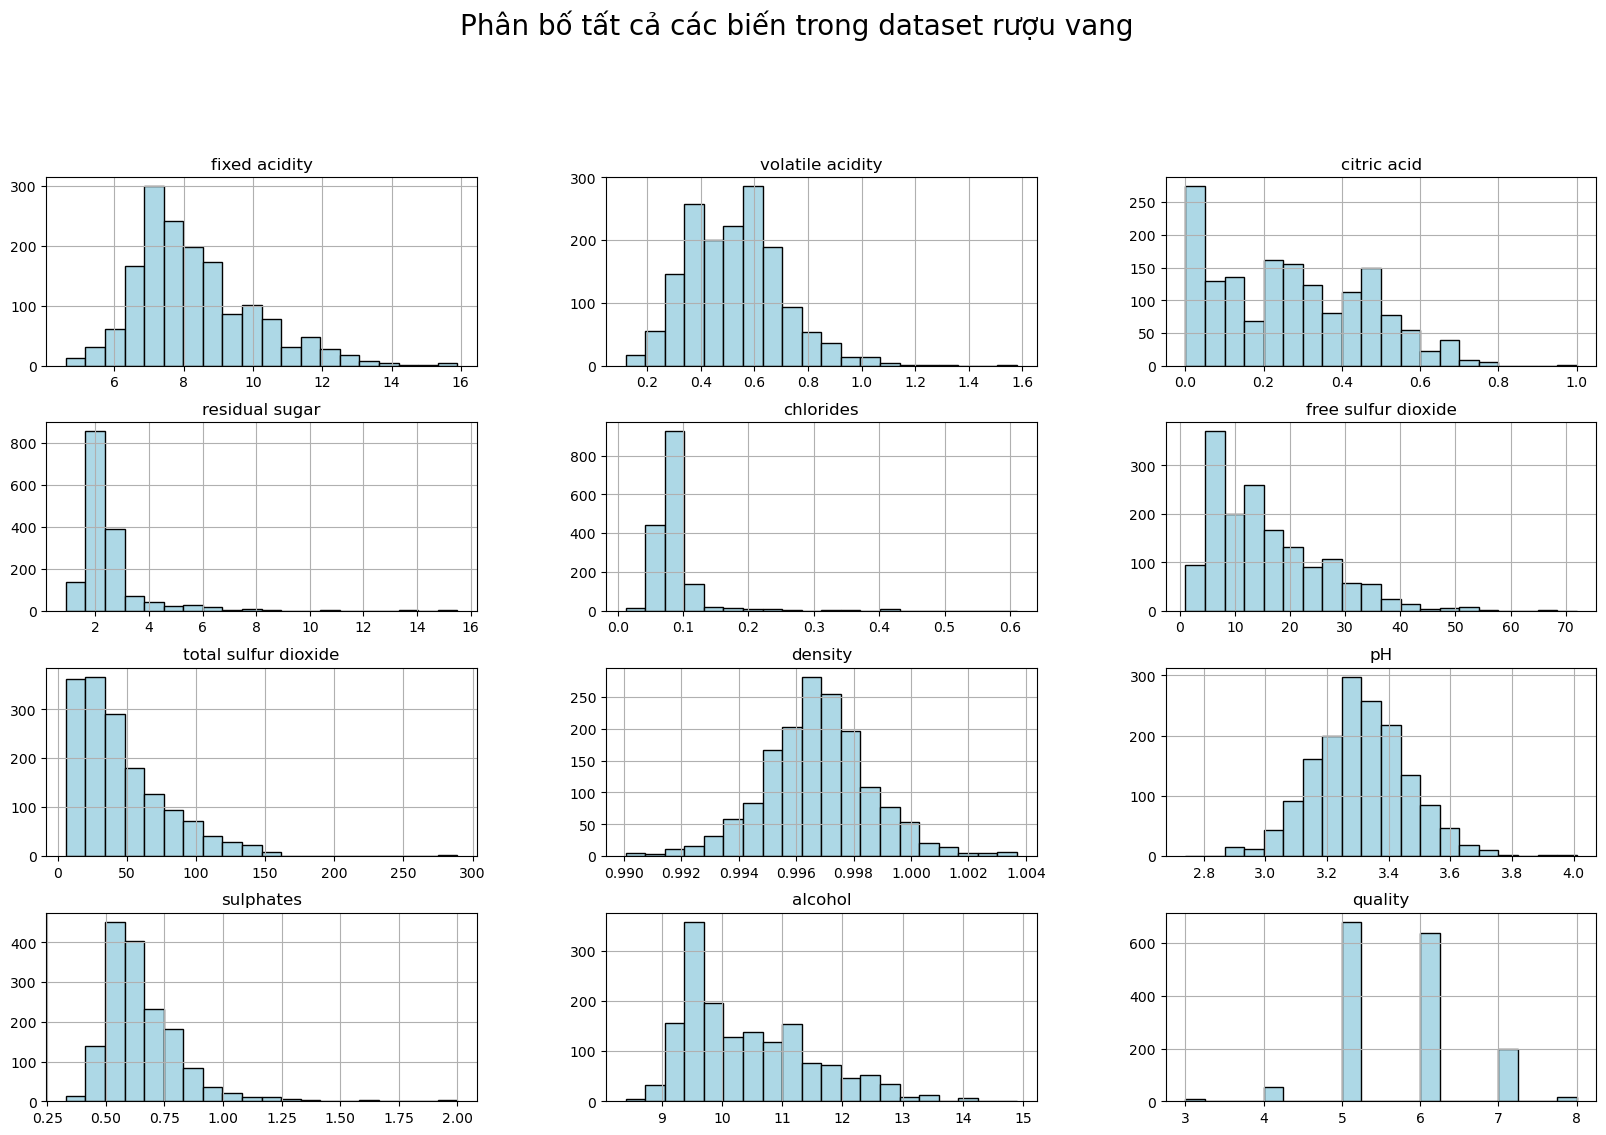

In [23]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("winequality-red.csv")

# Thiết lập kích thước toàn bộ hình
plt.figure(figsize=(20, 12))

# Vẽ histogram cho tất cả các biến
df.hist(bins=20, figsize=(20, 12), color='lightblue', edgecolor='black')
plt.suptitle("Phân bố tất cả các biến trong dataset rượu vang", fontsize=20, y=1.02)
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




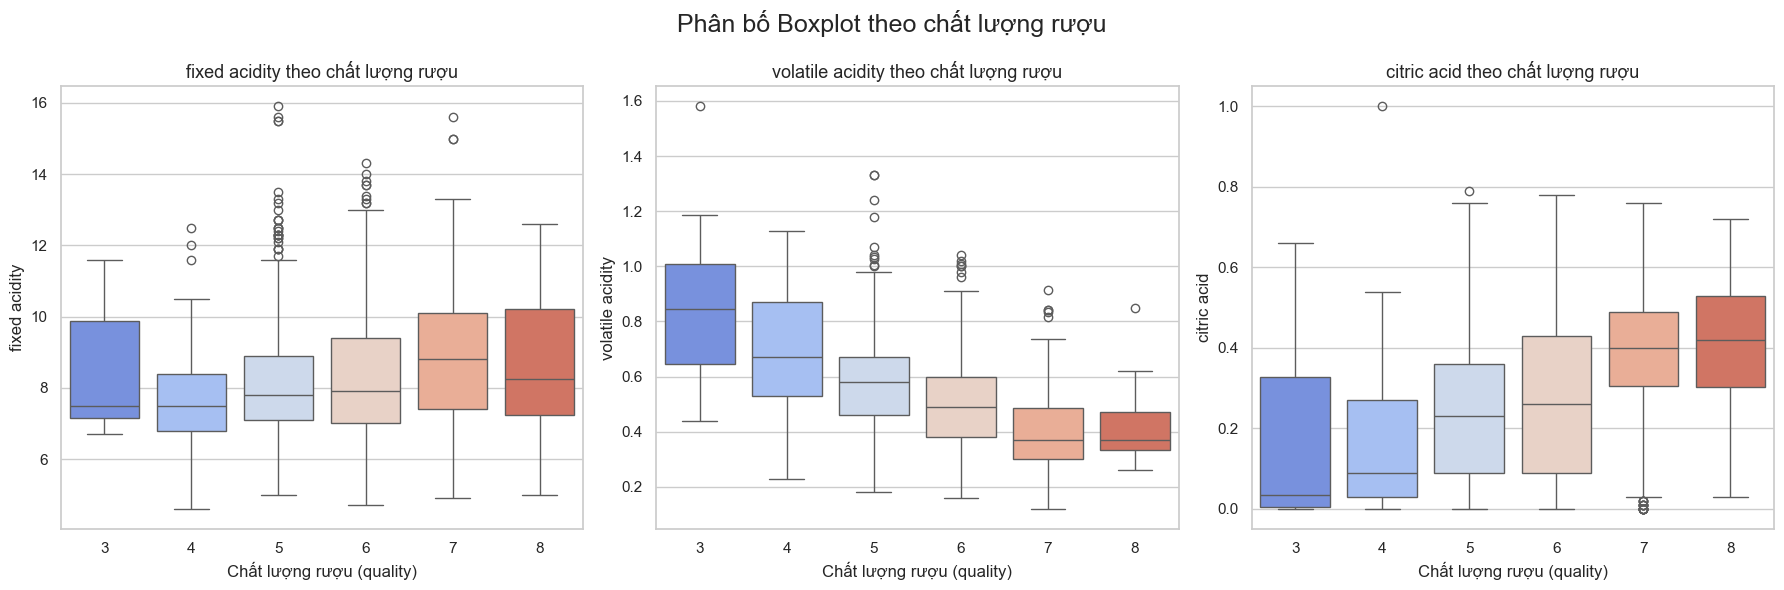

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




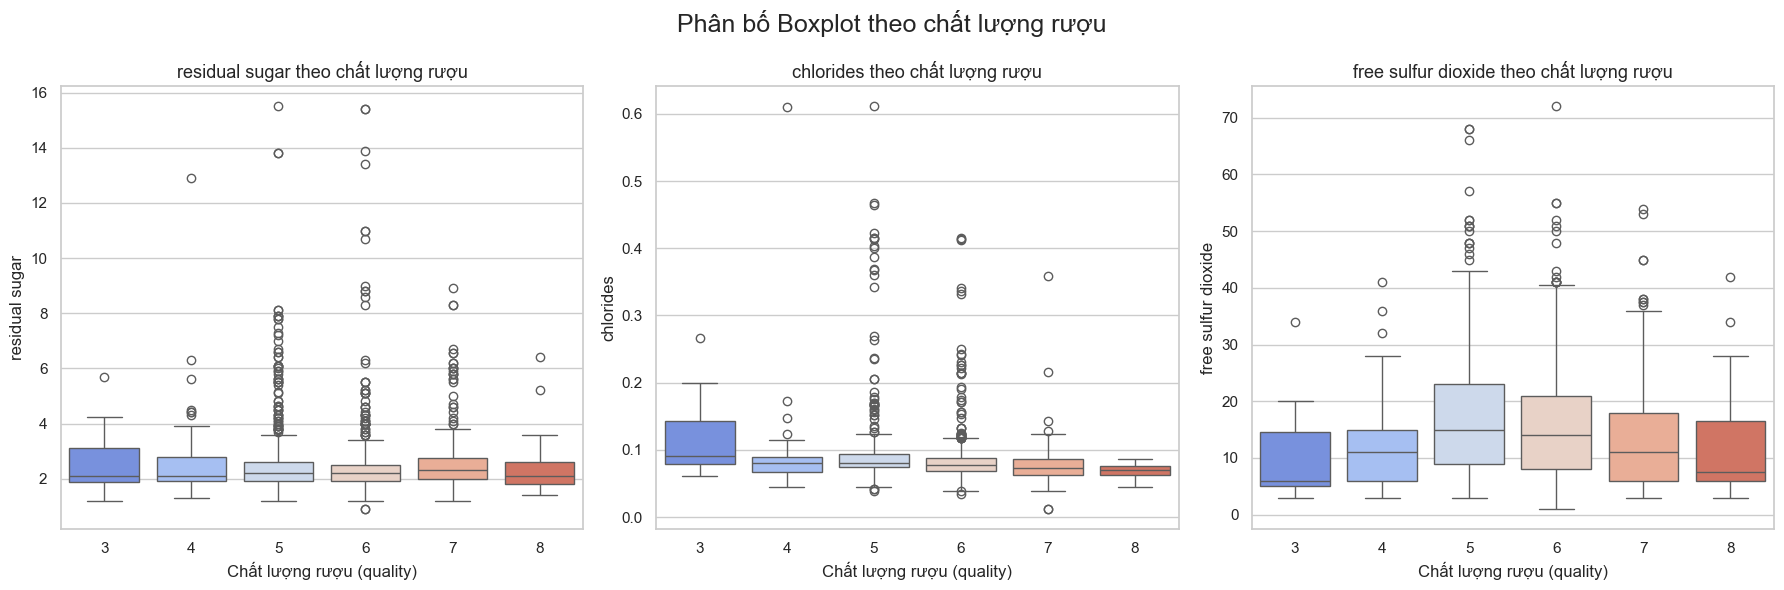

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




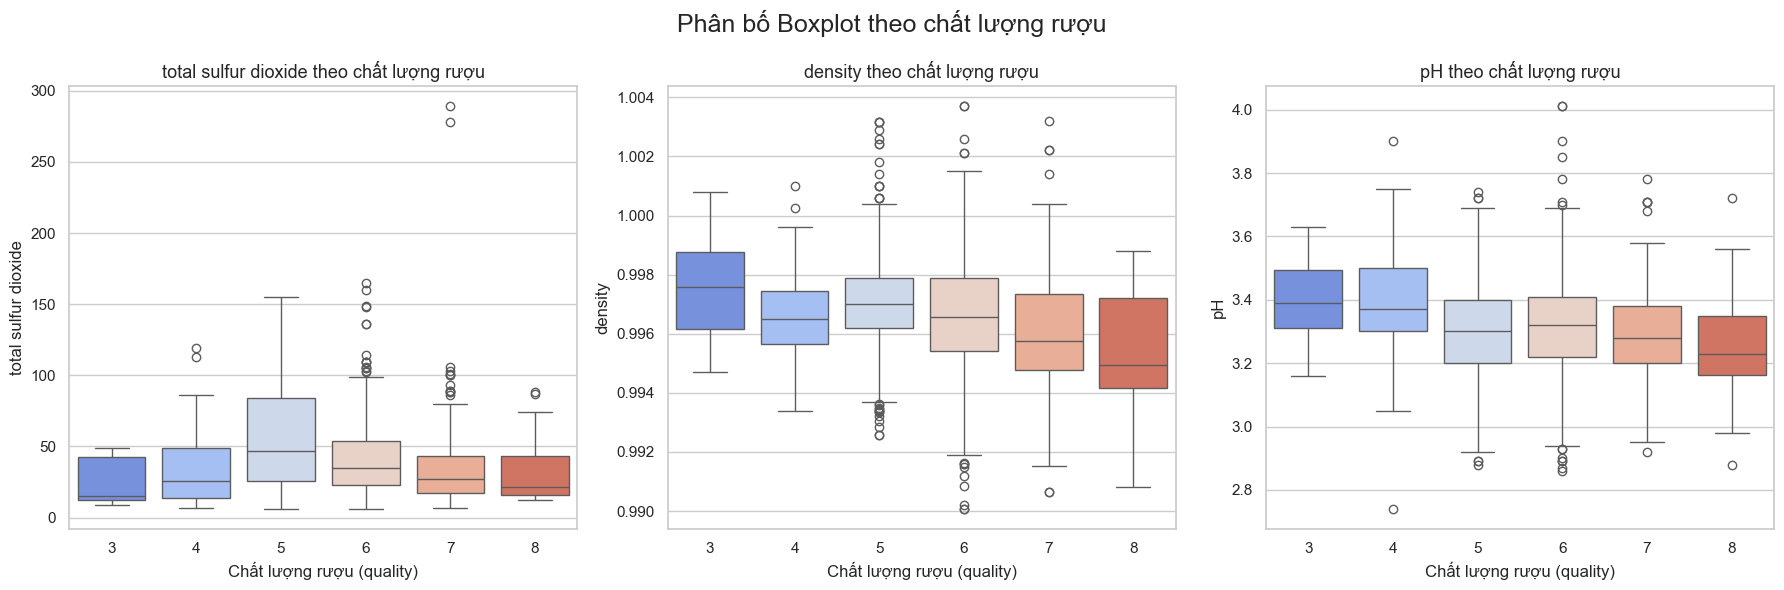

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4332\86368593.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




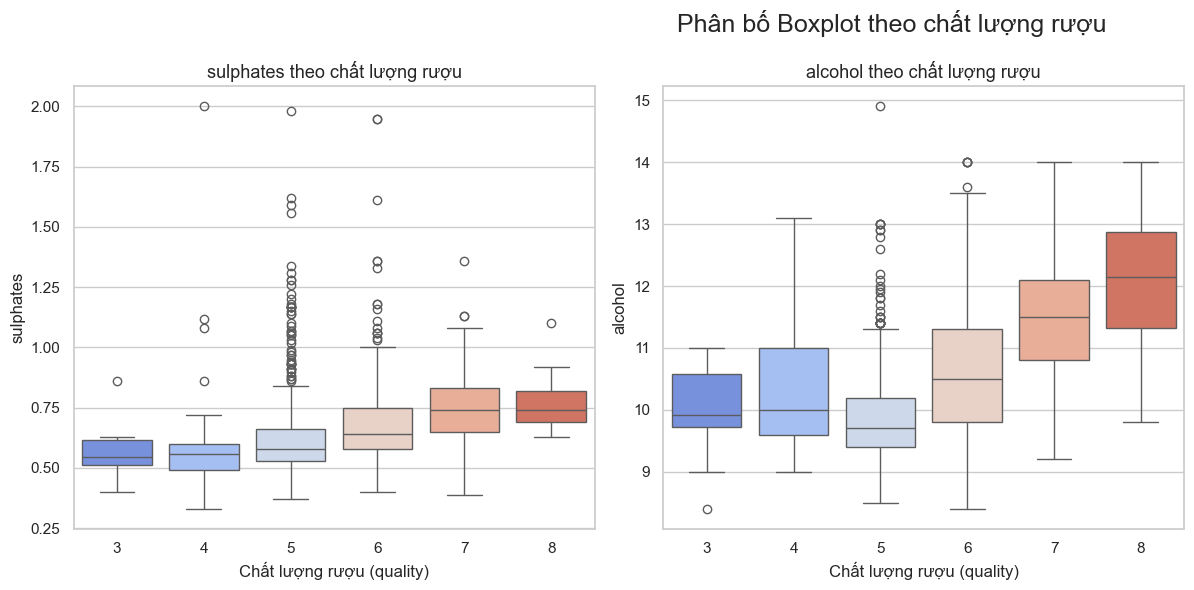

In [26]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("winequality-red.csv")

# Thiết lập giao diện
sns.set(style="whitegrid")

# Các biến độc lập (trừ quality)
cols = [col for col in df.columns if col != 'quality']

# Chia thành nhóm 3 biến mỗi hình
for i in range(0, len(cols), 3):
    sub_cols = cols[i:i+3]  # Lấy 3 biến mỗi lần
    plt.figure(figsize=(18, 6))
    plt.suptitle("Phân bố Boxplot theo chất lượng rượu", fontsize=18)
    
    for j, col in enumerate(sub_cols):
        plt.subplot(1, 3, j+1)
        sns.boxplot(x='quality', y=col, data=df, palette='coolwarm')
        plt.title(f"{col} theo chất lượng rượu", fontsize=13)
        plt.xlabel("Chất lượng rượu (quality)")
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()


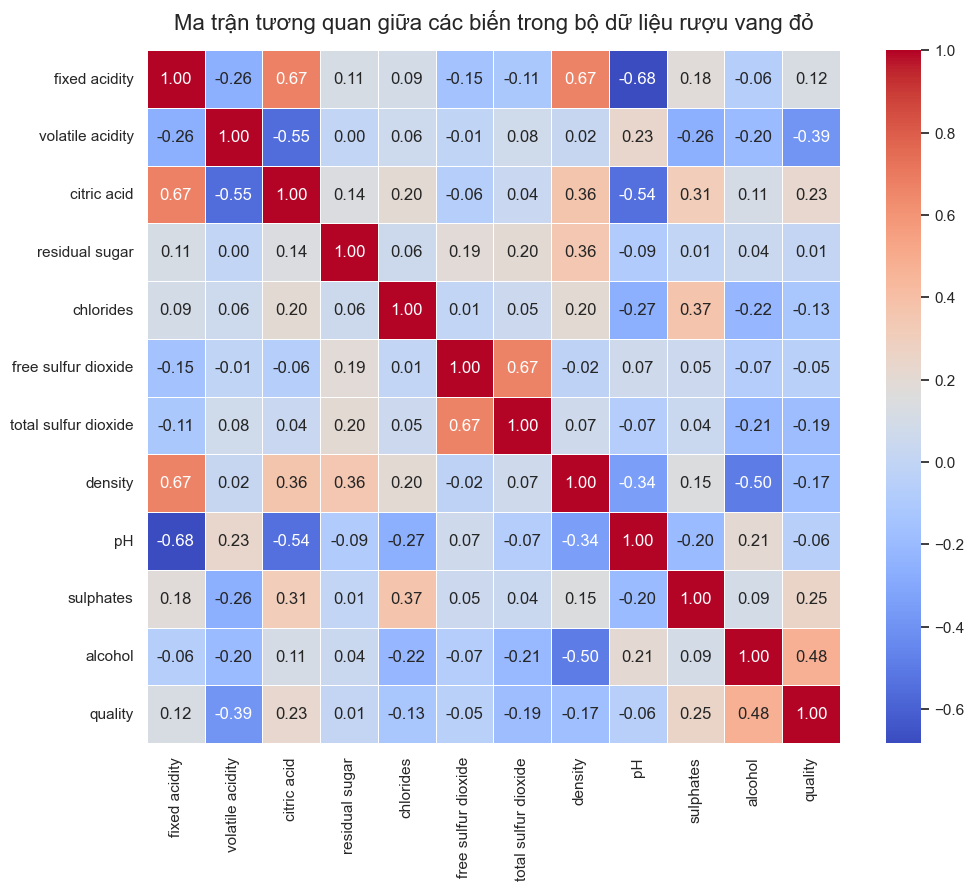

In [27]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("winequality-red.csv")

# Tính hệ số tương quan
corr = df.corr()

# Vẽ heatmap ma trận tương quan
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến trong bộ dữ liệu rượu vang đỏ", fontsize=16, pad=15)
plt.show()


In [12]:
fig = px.histogram(df_duplicate,x='quality', 
                   labels={'quality': 'Chất lượng rượu', 'count': 'Số lượng'},
                   title="Biểu đồ phân phối chất lượng rượu")
fig.update_yaxes(title="Số lượng")
fig.update_traces(
    hovertemplate="Chất lượng rượu = %{x}<br>Số lượng = %{y}"
)
fig.show()

### Destiny plot

Text(0.5, 1.0, 'Phân phối mật độ của quality')

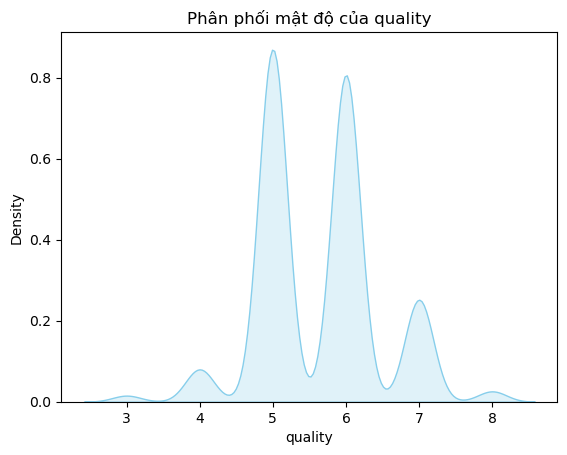

In [13]:
sns.kdeplot(df_duplicate['quality'], fill=True, color='skyblue')
plt.title("Phân phối mật độ của quality")

### Pie Chart

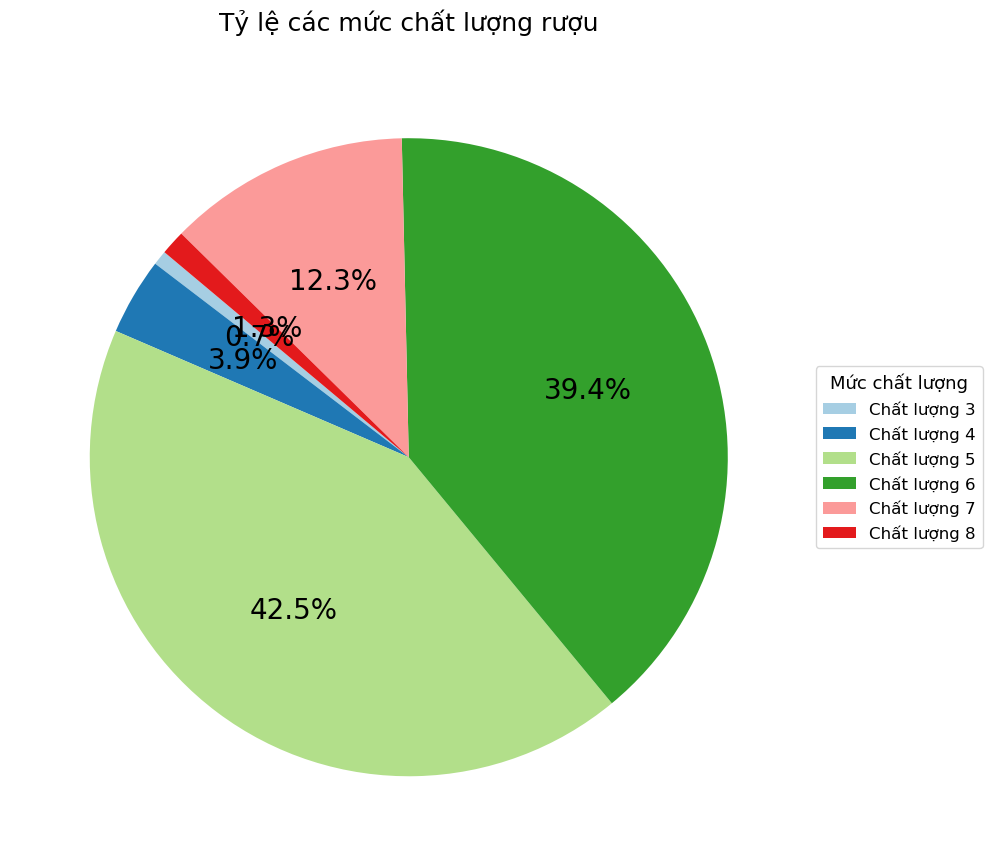

In [14]:
# Đếm số lượng từng mức chất lượng
quality_counts = df_duplicate['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    quality_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 20}
)
plt.title('Tỷ lệ các mức chất lượng rượu', fontsize=18, pad=20)
plt.legend(
    wedges,
    [f'Chất lượng {q}' for q in quality_counts.index],
    title="Mức chất lượng",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),   # đẩy legend ra ngoài bên phải
    fontsize=12,
    title_fontsize=13
)
plt.tight_layout()
plt.savefig('images/pie_chart.pdf')
plt.show()

➤ Ta có thể thấy mức phân bố chủ yếu của chất lượng rượu đa số ở mức 5,6. Mức 7 cũng phân bố trung bình - thấp hơn 2 mức kia, các mức còn lại rất thấp.

## Câu hỏi đặt ra
### Tính chất nào có mối tương quan nhiều nhất đối với chất lượng rượu?

### Heatmap

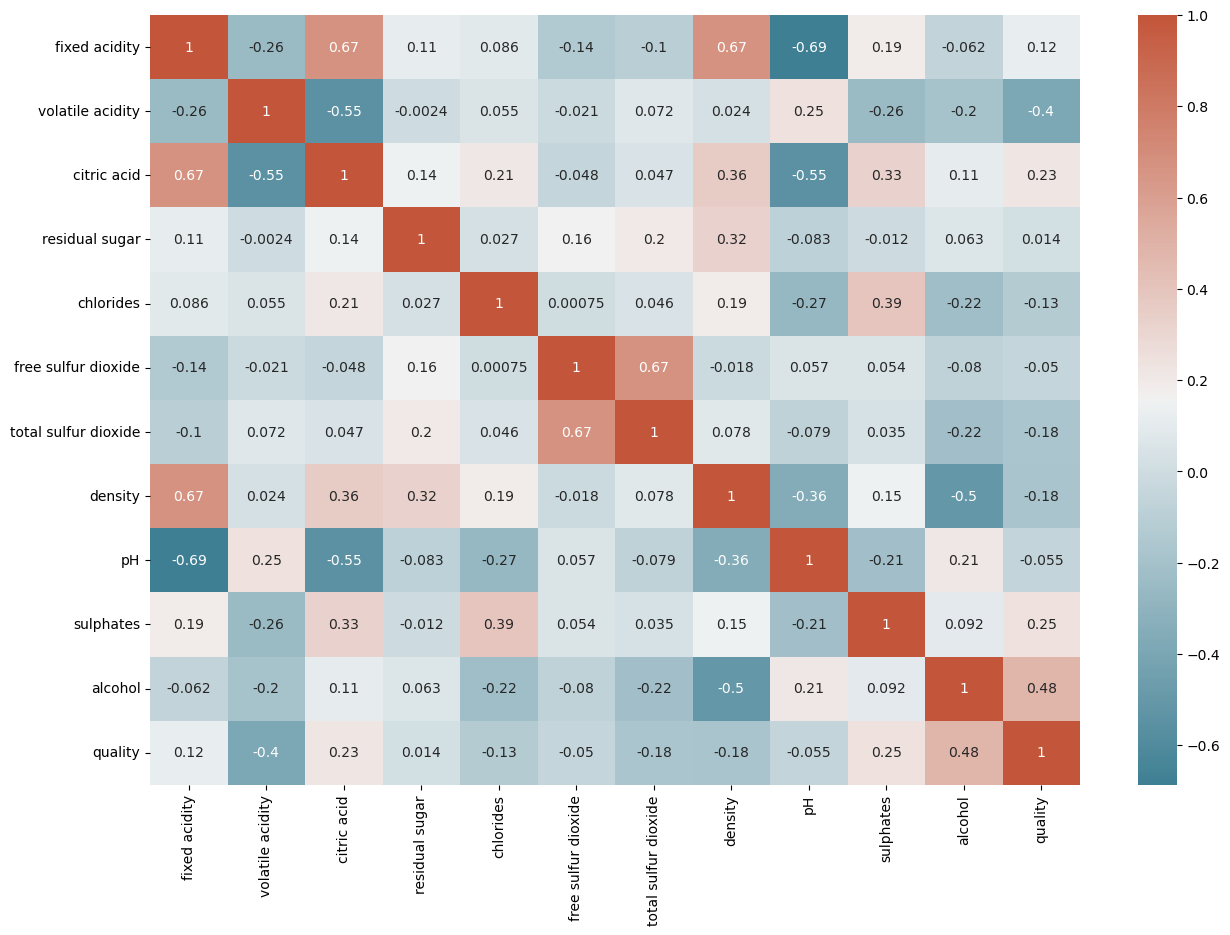

In [15]:
corr = df_duplicate.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig('images/heatmap.pdf')

In [16]:
corr = df_duplicate.corr()['quality'].sort_values(ascending=False)
corr

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

\- Thông qua Heatmap ta thấy có một vài biến có tương quan với biến 'quality', cụ thể như sau:

\+ 'alcohol' : có mức tương quan dương khá lớn (0.48).

\+ 'volatile acidity' : có mức tương quan âm trung bình (-0.39).

\+ 'sulphates' : tương quan dương yếu - trung bình (0.25).

\+ 'citric acid' : tương quan dương yếu.

➤ Nhận xét: Nồng độ cồn (alcohol) có ảnh hưởng lớn đến chất lượng, nồng độ cao sẽ có chất lượng tốt hơn. Bên cạnh đó, độ axit dễ bay hơi (volatile acidity) cao sẽ làm cho chất lượng giảm. Ngoài ra có thể tăng một ít sunfat (sulphates) và axit xitric (citric acid) để tăng chất lượng rượu.



### Pair plot

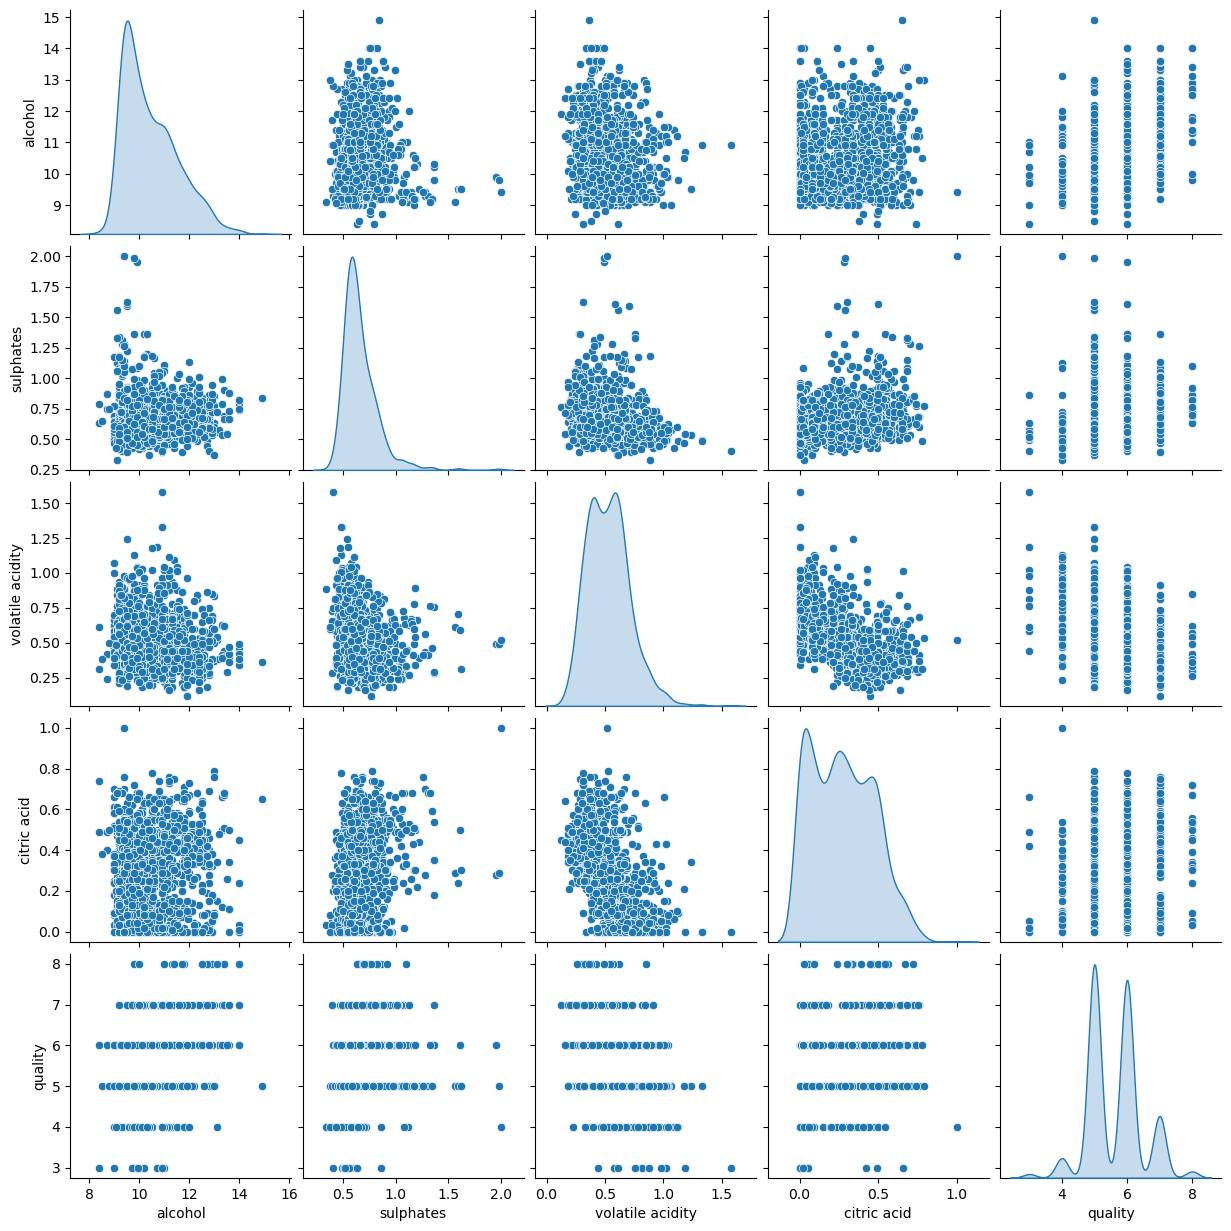

In [17]:
sns.pairplot(df_duplicate[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'quality']], diag_kind='kde')
plt.savefig('images/pair_plot.pdf')
plt.show()

- alcohol vs quality: Các điểm có xu hướng tăng dần từ trái sang phải → Nồng độ cồn càng cao thì chất lượng rượu càng tốt. Đây là mối tương quan dương mạnh nhất trong toàn bộ biểu đồ.

- volatile acidity vs quality: Các điểm có xu hướng giảm → Axit dễ bay hơi cao thì chất lượng rượu giảm.

- sulphates vs quality: Có xu hướng hơi tăng nhẹ → Chất bảo quản (sunfat) tăng thì chất lượng có thể tốt hơn, nhưng tương quan yếu (~0.25).

- citric acid vs quality: Xu hướng tăng nhẹ nhưng không rõ rệt → Tương quan dương yếu, chỉ hỗ trợ nhẹ trong việc tăng chất lượng.

### ➤ Nồng độ cồn (alcohol) có ảnh hưởng lớn nhất đến chất lượng.

## Biểu đồ

### Bar Chart

Text(0.5, 1.0, 'Trung bình Alcohol theo Chất lượng rượu')

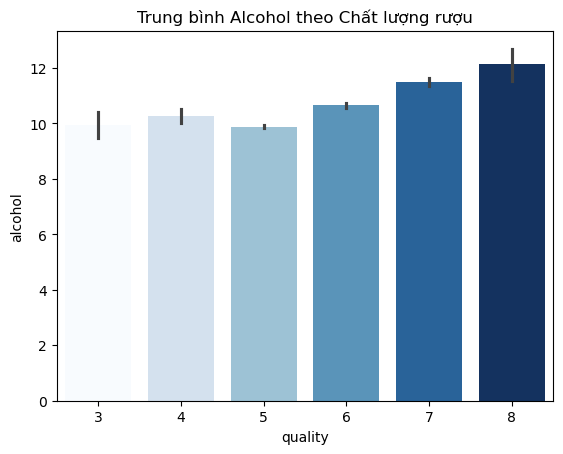

In [18]:
sns.barplot(
    x='quality', 
    y='alcohol', 
    hue='quality',         
    data=df_duplicate, 
    palette='Blues', 
    legend=False   )
plt.savefig('images/bar_plot.pdf')
plt.title("Trung bình Alcohol theo Chất lượng rượu")

### Violin plot

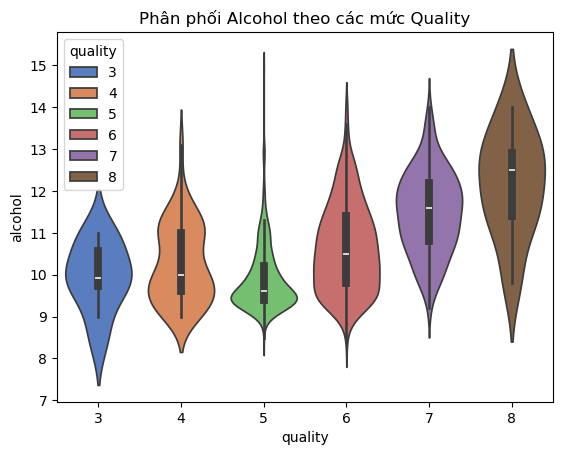

In [19]:
sns.violinplot(x='quality', y='alcohol', data=df_duplicate, palette='muted', hue='quality')
plt.title("Phân phối Alcohol theo các mức Quality")
plt.savefig('images/violin.pdf')

### Scatter plot

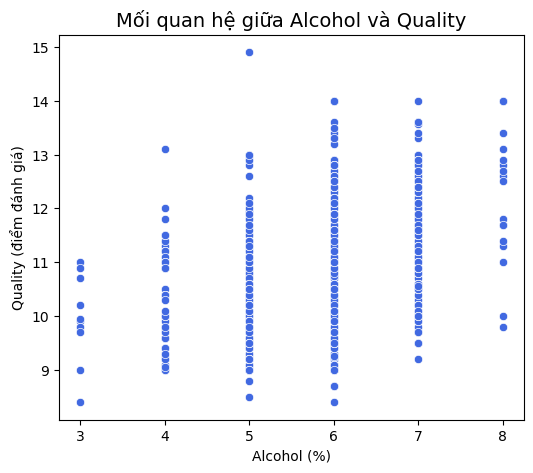

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='quality', y='alcohol', data=df_duplicate, color='royalblue')

plt.title("Mối quan hệ giữa Alcohol và Quality", fontsize=14)
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality (điểm đánh giá)")
plt.savefig('images/scatter.pdf')
plt.show()

### Boxplot

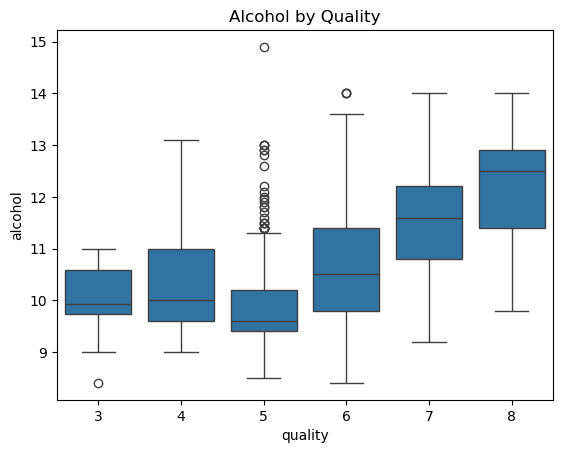

In [21]:
sns.boxplot(data=df_duplicate, x='quality', y='alcohol')
plt.title('Alcohol by Quality')
plt.savefig('images/box.pdf')
plt.show()

Mô tả: 
- Với quality = 3: Trung vị ở mức khoảng 10.0. Phần lớn rượu có chất lượng thấp chứa lượng cồn thấp (9–11), có một vài ngoại lai dưới 9.

- Với quality = 5 (chất lượng phổ biến nhất trong dataset): Trung vị ở mức khoảng 10.0, thấp hơn so với chất lượng cao hơn. Có rất nhiều outliers với alcohol > 11, nghĩa là một số rượu có cồn cao nhưng chất lượng vẫn chỉ đạt mức 5.

- Với quality = 6: Trung vị ở mức khoảng 11.0. Độ phân tán lớn hơn, nhiều rượu có cồn cao hơn.

- Với quality = 7 và 8: Trung vị tăng rõ rệt (~11.5–12.5). Hộp dịch lên → rượu chất lượng cao thường có cồn cao hơn và ít outliers hơn

➤ Qua các biểu đồ có thể thấy rõ, từ mức chất lượng từ 3-5, sự tương quan nồng độ cồn với chất lượng chưa thể hiện rõ, có lúc thấp lúc cao. Nhưng từ mức chất lượng từ 6 trở lên, nồng độ cồn tăng tỉ lệ thuận với chất lượng, thể hiện sức ảnh hưởng lớn của nó đến chất lượng rượu.

# Tổng kết

Mức phân bố chủ yếu của biến chất lượng 'quality' tập trung ở khoảng giá trị 5 và 6. Giá trị trung bình khoảng 5.6 .

Nồng độ cồn (alcohol) có ảnh hưởng lớn đến chất lượng rượu, độ axit dễ bay hơi có ảnh hưởng trung bình, sunfat và axit xitrit có ảnh hưởng thấp. Các biến còn lại rất kém, không đáng kể.

